In [5]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVR
from sklearn import svm, datasets


data = sio.loadmat('svm-rbf-data.mat')

#cleaning up

X_col = data['X'][:,0]
n = X_col.size
A = np.reshape(X_col, (n,1))

X2_col = data['X'][:,1]
B = np.reshape(X2_col, (n,1))
y_col = dat2['y'][:,0]
C = np.reshape(y_col, (n,1))

data_clean = np.concatenate((A,B,C),axis=1)
pd.DataFrame(data_clean).head()

,0,1,2
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0


Accuracy: 0.9266409266409267


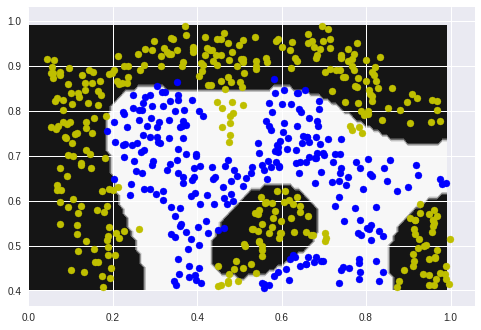

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_clean[:,0:2], 
                                                    data_clean[:,2], test_size=0.3,random_state=109) 

# splitting positive / negative samples

pos = y_train[:] ==1
neg = y_train[:] ==0

posX1 = x_train[pos][:,0]
posX2 = x_train[pos][:,1]

negX1 = x_train[neg][:,0]
negX2 = x_train[neg][:,1]

plt.scatter(posX1, posX2, color = 'y')
plt.scatter(negX1, negX2, color = 'b')

# support vector machine, high C

clf = svm.SVC(C=10000, gamma ='scale', kernel='rbf')
model = clf.fit(x_train, y_train)

x2_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, x2_pred))

# plot boundary

xx1, xx2 = np.meshgrid(np.arange(0, 1, 0.01),
                       np.arange(0.4, 1, 0.01))

xx1_flat, xx2_flat = (xx1.ravel(), xx2.ravel())
xx = np.column_stack((xx1_flat, xx2_flat))
zz = clf.predict(xx)
zz_plot = zz.reshape(60, 100)

plt.contourf(xx1, xx2, zz_plot, zorder=0)
plt.show()